# Setup for downloading Yelp Dataset in Kaggle

In [1]:
 !pip install -q kaggle
 !pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 5.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=5af18f324711a925521057370f6486d73dbb3ac5e17a92fd1e3225284f0d0e12
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
# Choose the kaggle.json file that you downloaded
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sejinchun","key":"14e04457c24456020a0ba073f807b42a"}'}

In [3]:
# Make directory named kaggle and copy kaggle.json file there.
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json #Change the permissions of the file.

In [5]:
!kaggle datasets download -d yelp-dataset/yelp-dataset

100% 4.91G/4.92G [00:33<00:00, 127MB/s]
100% 4.92G/4.92G [00:34<00:00, 155MB/s]


In [6]:
!mkdir data 
!unzip yelp-dataset.zip -d data #unzip

Archive:  yelp-dataset.zip
  inflating: data/Dataset_User_Agreement.pdf  
  inflating: data/yelp_academic_dataset_business.json  
  inflating: data/yelp_academic_dataset_checkin.json  
  inflating: data/yelp_academic_dataset_review.json  
  inflating: data/yelp_academic_dataset_tip.json  
  inflating: data/yelp_academic_dataset_user.json  


# libraries

In [7]:
!pip install folium -U

     |████████████████████████████████| 95 kB 3.6 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1.post1 which is incompatible.


In [8]:
#basics
import numpy as np
import pandas as pd
import json

#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import folium
import folium.plugins as plugins

%matplotlib inline


# Imports

In [9]:
def read_json(filename):
  data = []
  with open(filename) as fl:
      for i, line in enumerate(fl):
          data.append(json.loads(line))
          if i+1 >= 100000:
              break
  return pd.DataFrame(data)

In [10]:
%timeit
#importing every dataset
business= read_json("/content/data/yelp_academic_dataset_business.json")
check_in= read_json("/content/data/yelp_academic_dataset_checkin.json")
reviews= read_json("/content/data/yelp_academic_dataset_review.json")
tips= read_json("/content/data/yelp_academic_dataset_tip.json")
users= read_json("/content/data/yelp_academic_dataset_user.json")

# Explore Yelp dataset

In [11]:
#take a peak
business.head()

business_id  ...                                              hours
0  6iYb2HFDywm3zjuRg0shjw  ...  {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...
1  tCbdrRPZA0oiIYSmHG3J0w  ...  {'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...
2  bvN78flM8NLprQ1a1y5dRg  ...  {'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...
3  oaepsyvc0J17qwi8cfrOWg  ...                                               None
4  PE9uqAjdw0E4-8mjGl3wVA  ...  {'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'...

[5 rows x 14 columns]

In [12]:
users.head()

user_id       name  ...  compliment_writer compliment_photos
0  q_QQ5kBBwlCcbL1s4NVK3g       Jane  ...                815               323
1  dIIKEfOgo0KqUfGQvGikPg       Gabi  ...                472               294
2  D6ErcUnFALnCQN4b1W_TlA      Jason  ...                  3                 1
3  JnPIjvC0cmooNDfsa9BmXg        Kat  ...                391               326
4  37Hc8hr3cw0iHLoPzLK6Ow  Christine  ...                 98                44

[5 rows x 22 columns]

In [13]:
reviews.head()

review_id  ...                 date
0  lWC-xP3rd6obsecCYsGZRg  ...  2014-10-11 03:34:02
1  8bFej1QE5LXp4O05qjGqXA  ...  2015-07-03 20:38:25
2  NDhkzczKjLshODbqDoNLSg  ...  2013-05-28 20:38:06
3  T5fAqjjFooT4V0OeZyuk1w  ...  2010-01-08 02:29:15
4  sjm_uUcQVxab_EeLCqsYLg  ...  2011-07-28 18:05:01

[5 rows x 9 columns]

In [14]:
check_in.head()

business_id                                               date
0  --0r8K_AQ4FZfLsX3ZYRDA                                2017-09-03 17:13:59
1  --0zrn43LEaB4jUWTQH_Bg  2010-10-08 22:21:20, 2010-11-01 21:29:14, 2010...
2  --164t1nclzzmca7eDiJMw  2010-02-26 02:06:53, 2010-02-27 08:00:09, 2010...
3  --2aF9NhXnNVpDV0KS3xBQ  2014-11-03 16:35:35, 2015-01-30 18:16:03, 2015...
4  --2mEJ63SC_8_08_jGgVIg  2010-12-15 17:10:46, 2013-12-28 00:27:54, 2015...

In [15]:
tips.head()

user_id  ... compliment_count
0  WCjg0jdHXMlwbqS9tZUx8Q  ...                0
1  42-Z02y9bABShAGZhuSzrQ  ...                0
2  5u7E3LYp_3eB8dLuUBazXQ  ...                0
3  wDWoMG5N9oI4DJ-p7z8EBg  ...                0
4  JmuFlorjjRshHTKzTwNtgg  ...                0

[5 rows x 5 columns]

# Ratings distribution

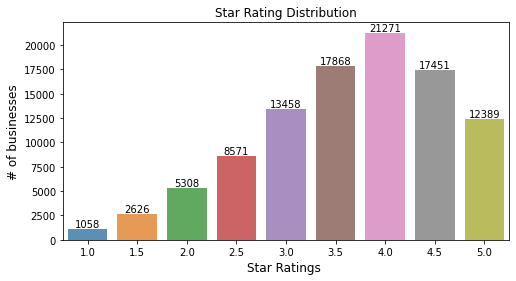

In [16]:
# 별점에 대한 분포
x=business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [17]:
business = business[business.categories.notnull()]

In [18]:
# 가장 인기 있는 비지니스 카테고리?
business_cats =' '.join(business['categories'])

cats=pd.DataFrame(business_cats.split(','),columns=['category'])
x=cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

There are  43208  different types/categories of Businesses in Yelp!


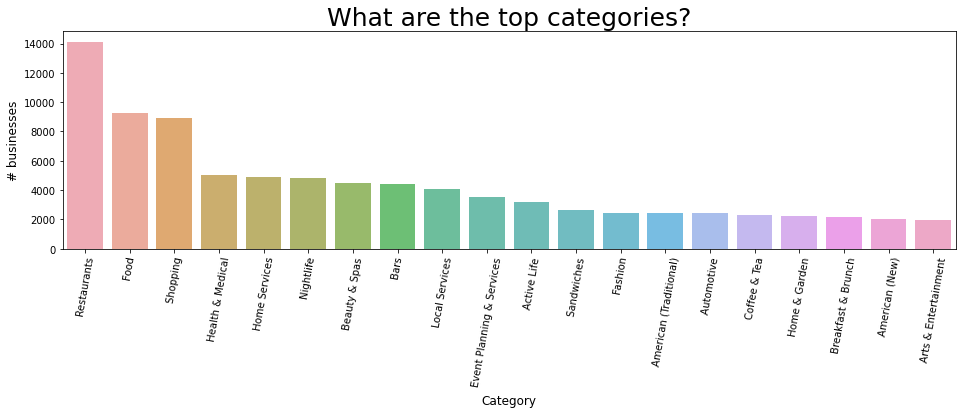

In [19]:
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

plt.show()

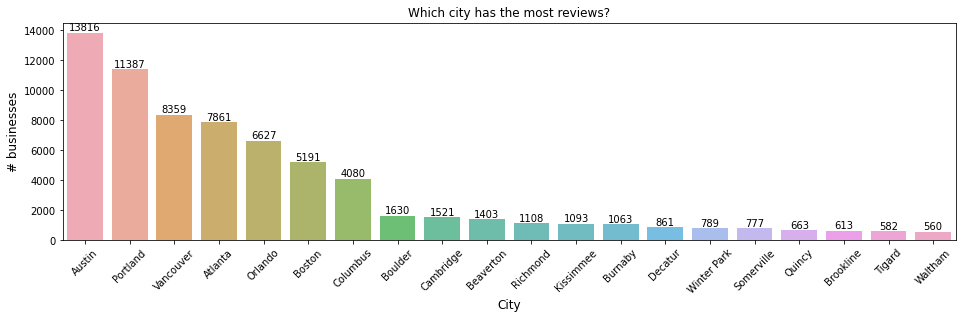

In [20]:
# 도시별 별점에 대한 분포
x=business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x= x.index, y=x.values, alpha=0.8)#,color=color[3])
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# Map visualization
특정 도시에 대한 비지니스(상점) 분포, 표기 및 히트맵

## Calculate the buiness' popularity 
평점 * 리뷰의 수를 계산하여 상점의 인기도를 계산함.
$ Popularity (Rating, NumOfReview) = Rating * NumOfReview$

In [21]:
#get all ratings data
rating_data=business.loc[:, ['latitude','longitude','stars','review_count', 'categories', 'name']]
# Creating a custom column popularity using stars * no_of_reviews
rating_data['popularity'] = rating_data['stars']*rating_data['review_count']

## scatter

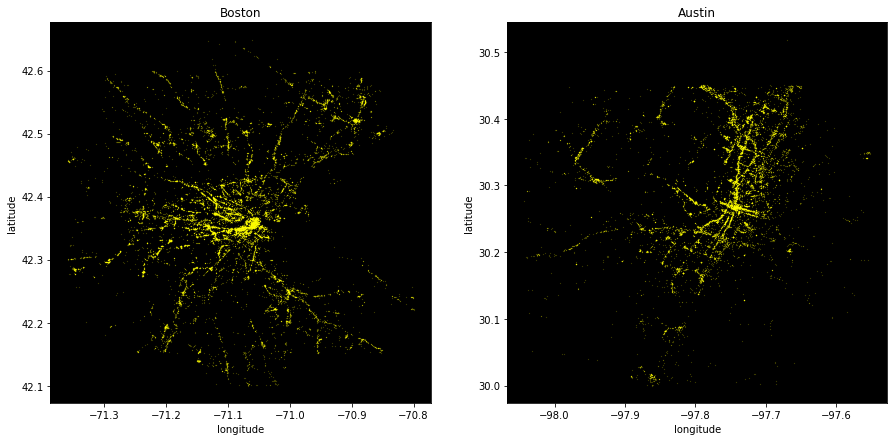

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

#a random point inside Boston
lat = 42.3601
lon = -71.0589
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for Boston
ratings_data_Boston=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

#Facet scatter plot
ratings_data_Boston.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Boston")
ax1.set_facecolor('black')

#a random point inside Austin
lat = 30.2672
lon = -97.7431
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for Austin
ratings_data_Austin=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#plot Austin
ratings_data_Austin.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Austin")
ax2.set_facecolor('black')
f.show()

In [23]:
data=[]
#rearranging data to suit the format needed for folium
stars_list=list(rating_data['stars'].unique())
for star in stars_list:
    subset= ratings_data_Boston[ratings_data_Boston['stars']==star]
    data.append(subset[['latitude','longitude']].values.tolist())

## Set up a city

In [24]:
CITY = 'Austin'
lat = 42.3601
lon = -71.0589
ratings_data_by_city = ratings_data_Boston

## markers

In [25]:
icons = { 'Restaurants': 'info-sign' }
def get_icons(categories):
  '''
  categories에 대응되는 아이콘 리턴
  '''
  cate = categories.split(',')
  for c in cate:
    if c in icons:
      return icons[c]
  
  return 'cloud'

In [26]:
#initialize 
zoom_start=11

# basic map
m = folium.Map(location=[lat, lon], tiles='stamentoner', zoom_start=zoom_start)

# assign makers to map
for row in ratings_data_by_city[:40].itertuples():
  lat, lon = row[1], row[2]
  folium.Marker(
    location=[ lat, lon ],
    popup= row[6],
    icon=folium.Icon(color='red', icon=get_icons(row[5]))
  ).add_to(m)

m

## heatmap

In [27]:
#initialize at Boston
# lat = 42.3601
# lon = -71.0589
zoom_start=11

# basic map
m = folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

# assign heatmap to map
for subdata in data:
  hmap = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=7)
  hmap.add_to(m)


m.save('index.html')
m

# User networks

In [28]:
#subset users who have atleast one friend
subset_users=users[users['friends']!='None']
#user has given atleast 10 reviews
subset_users=subset_users[subset_users['review_count']>=10]
#subset_users=subset_users.sort_values('review_count',ascending=False)

subset_users['list_friends']=subset_users["friends"].apply(lambda x: str(x).split(','))

subset_users=subset_users[['user_id','list_friends']]
#stopping at 6k due to space constraints
subset_users=subset_users.iloc[0:6000]
res = subset_users.set_index(['user_id'])['list_friends'].apply(pd.Series).stack()

In [29]:
network_data=res.reset_index()
#checks
network_data.tail()

user_id  level_1                        0
2019955  9FrjysHHYEEtp5Y0jqLE1w       53   DOj9NanlJP3xntULCy5Uow
2019956  9FrjysHHYEEtp5Y0jqLE1w       54   QJI9OSEn6ujRCtrX06vs1w
2019957  9FrjysHHYEEtp5Y0jqLE1w       55   9LgnOncogsW2g3Ko0M8DhA
2019958  9FrjysHHYEEtp5Y0jqLE1w       56   KErEcf4XdNyp1Jhsxnoqqg
2019959  9FrjysHHYEEtp5Y0jqLE1w       57   C0AffsWisc5biE1sUZT5cg

In [30]:
#changing the column name to suit nx import
network_data.columns=['source','level_1','target']

# Considering each (user_id,friend) pair as an edge of a graph, constructing the graph
graph=nx.from_pandas_edgelist(network_data)

In [31]:
print(nx.info(graph))
print("The density of the graph is ",nx.density(graph))

Graph with 927827 nodes and 2019959 edges
The density of the graph is  4.6928752039479895e-06


Subgraph 

In [32]:
subset=business[business.city== CITY ]
subset=pd.merge(subset,reviews,how='inner',on='business_id')
subset_users=subset.user_id.unique()

subset_users=pd.DataFrame(subset_users,columns=['user_id'])
subset_users=pd.merge(subset_users,users,how='inner',on='user_id')

# create friend list
subset_users['list_friends'] =subset_users["friends"].apply(lambda x: str(x).split(','))
subset_users['count_friends'] = subset_users["list_friends"].apply(lambda x: len(x))

#check
subset_users.shape

(7558, 24)

In [33]:
subset_users_list = subset_users.loc[:, ['user_id','list_friends']]
subset_users_list = subset_users_list.reset_index()
subset_users_list

index  ...                                       list_friends
0         0  ...  [Muc-FALdpbSs-ezxjSqhyA,  5UufYQiKqYsE9YmaIU3f...
1         1  ...  [B_DHWFs2DcRPUw8yCziXrg,  OAGvJ_40GdttgobsbeYo...
2         2  ...  [Y0u0X4ISSMht5Mwx8jAA6w,  u9hFg-oj_XVqlZHL-qEk...
3         3  ...  [oDTq2RmCpLY1MBPiTtLr7A,  b6c6Icsdap3qXY-xHHVi...
4         4  ...  [SykFoD1kxIbd2OYij8JJqw,  aHbNo-HJvKicYgqJ-5fC...
...     ...  ...                                                ...
7553   7553  ...  [PMB8VCJ7QsrOwbTyTmxbEQ,  4TVmHV3tBbwkEht55orU...
7554   7554  ...  [6SgNdZ07w5ZRcyE8Pc7inA,  dBkvScQyw0fh4qdA_Nrz...
7555   7555  ...  [680Ye8bHxULl3UFe6hVa3A,  0fP4D6shAUosiINZ3t99...
7556   7556  ...  [JLanlx88G76fUlZsLVfUWg,  88V3rsg9GMi6vkKezNbN...
7557   7557  ...  [RiOTI6oP3b3V_7iVYlKLEQ,  SDjnrOLHadykAjdWY2lZ...

[7558 rows x 3 columns]

In [34]:
network_data = subset_users_list.set_index(['user_id']).explode('list_friends')
network_data = network_data.reset_index()
network_data

user_id  index             list_friends
0        hkZX_cCQf7APcTtVEdzYjw      0   Muc-FALdpbSs-ezxjSqhyA
1        hkZX_cCQf7APcTtVEdzYjw      0   5UufYQiKqYsE9YmaIU3fJg
2        hkZX_cCQf7APcTtVEdzYjw      0   3kxM5_YlteEznvzaH1dPfg
3        hkZX_cCQf7APcTtVEdzYjw      0   jBeA8YZqo1Yu6Eyu2Qhr_Q
4        hkZX_cCQf7APcTtVEdzYjw      0   zn5gDcG0pXOeM2DPUSl6Wg
...                         ...    ...                      ...
1166157  ggsdIgw5yvdDhszdsaZ6Ew   7557   R3HG0aOxMyLnPklM7s1TFw
1166158  ggsdIgw5yvdDhszdsaZ6Ew   7557   -A3N8e1BmePV8HitnNJ4JQ
1166159  ggsdIgw5yvdDhszdsaZ6Ew   7557   kjjJE3OpF9tdy39rsJnqBw
1166160  ggsdIgw5yvdDhszdsaZ6Ew   7557   QA4wXnA89CxDl6j358yLlw
1166161  ggsdIgw5yvdDhszdsaZ6Ew   7557   xd09OLZYkk6XyYF5rOXBwQ

[1166162 rows x 3 columns]

In [35]:
network_data['target_id'] = network_data.index

In [36]:
# # subset_users_list=subset_users.loc[:, ['user_id','list_friends']]
# network_data = subset_users_list.apply(pd.DataFrame).stack()
# changing the column name to suit nx import

network_data.columns=['source_id','source','target_id','target']
network_data

source_id  source                target_id   target
0        hkZX_cCQf7APcTtVEdzYjw       0   Muc-FALdpbSs-ezxjSqhyA        0
1        hkZX_cCQf7APcTtVEdzYjw       0   5UufYQiKqYsE9YmaIU3fJg        1
2        hkZX_cCQf7APcTtVEdzYjw       0   3kxM5_YlteEznvzaH1dPfg        2
3        hkZX_cCQf7APcTtVEdzYjw       0   jBeA8YZqo1Yu6Eyu2Qhr_Q        3
4        hkZX_cCQf7APcTtVEdzYjw       0   zn5gDcG0pXOeM2DPUSl6Wg        4
...                         ...     ...                      ...      ...
1166157  ggsdIgw5yvdDhszdsaZ6Ew    7557   R3HG0aOxMyLnPklM7s1TFw  1166157
1166158  ggsdIgw5yvdDhszdsaZ6Ew    7557   -A3N8e1BmePV8HitnNJ4JQ  1166158
1166159  ggsdIgw5yvdDhszdsaZ6Ew    7557   kjjJE3OpF9tdy39rsJnqBw  1166159
1166160  ggsdIgw5yvdDhszdsaZ6Ew    7557   QA4wXnA89CxDl6j358yLlw  1166160
1166161  ggsdIgw5yvdDhszdsaZ6Ew    7557   xd09OLZYkk6XyYF5rOXBwQ  1166161

[1166162 rows x 4 columns]

In [37]:
# Considering each (user_id,friend) pair as an edge of a graph, constructing the graph
graph=nx.from_pandas_edgelist(network_data, source='source_id',target='target_id')

In [38]:
# graph info
print(nx.info(graph))
print("The density of the graph is ",nx.density(graph))

Graph with 730357 nodes and 1166151 edges
The density of the graph is  4.372350683996422e-06


In [39]:
x=nx.degree_centrality(graph)

In [40]:
influencers= heapq.nlargest(2000, x, key=x.get)

extract influencers-subgraph

In [41]:
#creating a sub-graph as I'm not able to create the layout positions without killing the kernal
influencers_sub_graph=graph.subgraph(influencers)

# Check for isolates ( nodes with no edges (ie) users without friends in the sub-graph)
# graph=graph.remove_nodes_from(nx.isolates(graph))
list_of_nodes_to_be_removed=[x for x in nx.isolates(influencers_sub_graph)]

# remove the selected isolates from the main graph
graph.remove_nodes_from(list_of_nodes_to_be_removed)

In [42]:
g = graph.subgraph(influencers)

In [43]:
# graph info
print(nx.info(g ))
print("The density of the graph is ",nx.density(g ))

Graph with 1057 nodes and 8813 edges
The density of the graph is  0.015791190046156933


# Graph visualization
spring layout, circle layout에 대해 확인

spring layout

In [44]:
# create the layout
pos = nx.spring_layout(g)

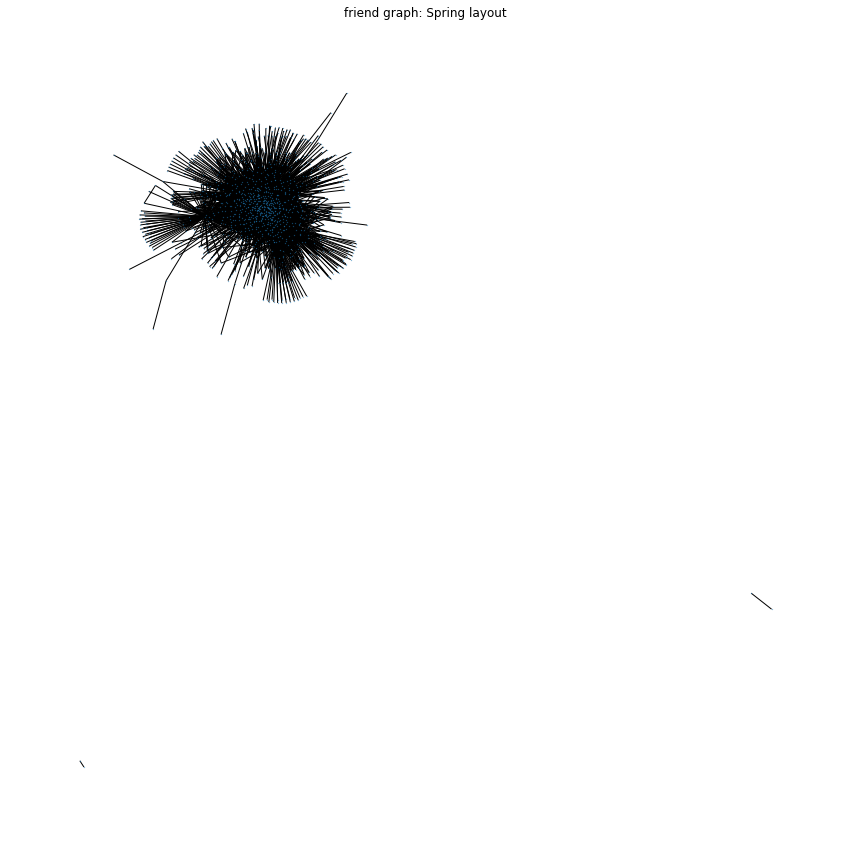

In [45]:
plt.figure(figsize=(15,15))
plt.title("friend graph: Spring layout")
nx.draw(g, pos=pos, node_size=0.05, width=1)

Circular layout

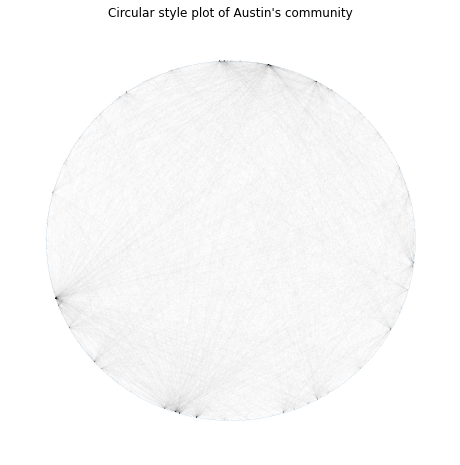

In [46]:
plt.figure(figsize=(8,8))
plt.title(f"Circular style plot of {CITY}'s community")
nx.draw_circular(g,node_size=0.001, width=0.001)

## Community detection

Louvain modularity

In [47]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [48]:
# compute the best partition
partition = community_louvain.best_partition(g)

In [49]:
len(partition)

1057

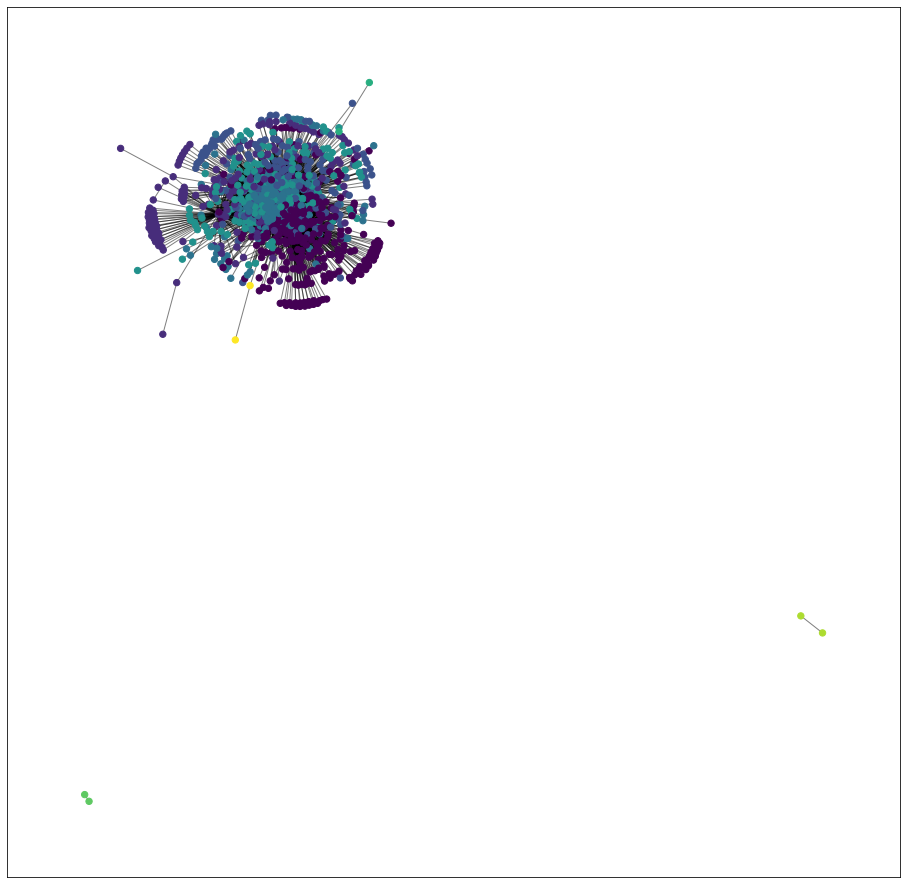

In [50]:
# draw the graph
# color the nodes according to their partition
plt.figure(figsize=(16,16))
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(g, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.show()

In [51]:
#community detection -- Done in 3 lines :p
import community
parts = community_louvain.best_partition(g)
values = [parts.get(node) for node in g.nodes()]

print(len(set(values))," Communities have been identified")

8  Communities have been identified


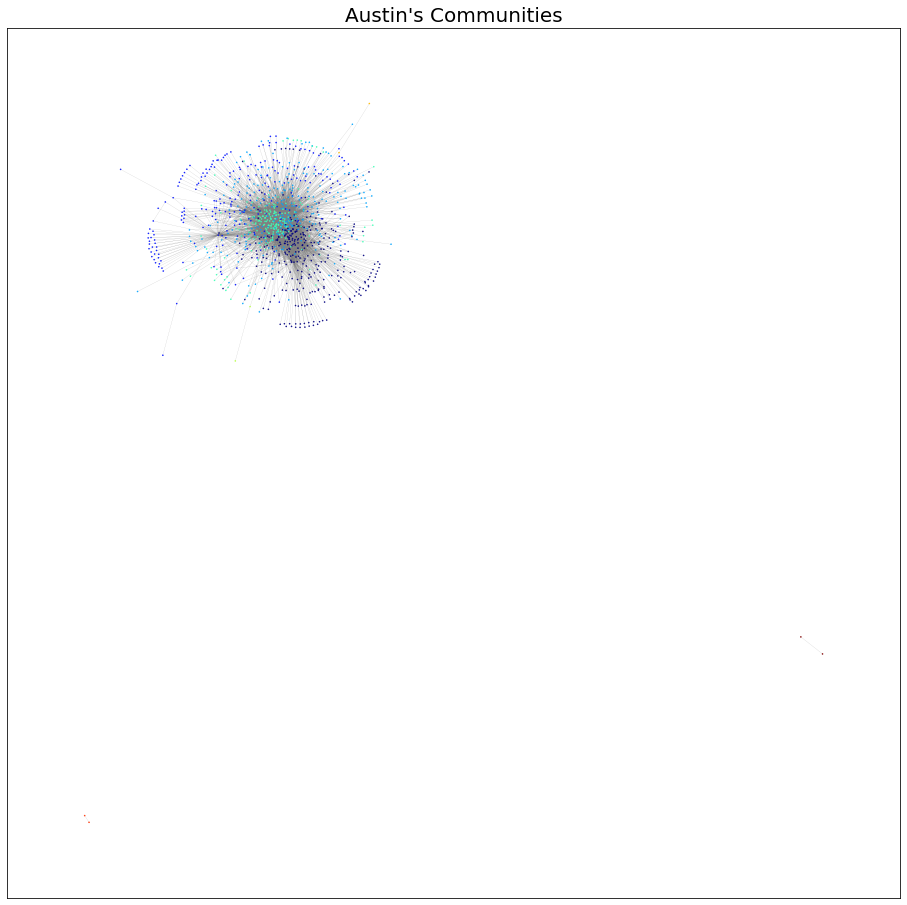

In [52]:
plt.figure(figsize=(16,16))
plt.axes=False
plt.title(f"{CITY}'s Communities",fontsize=20)
nx.draw_networkx(g, pos = pos,cmap = plt.get_cmap("jet"), node_color = values, node_size = 0.3, width=0.1, edge_color='gray', with_labels = False)

In [53]:
pos2 = nx.kamada_kawai_layout(g)

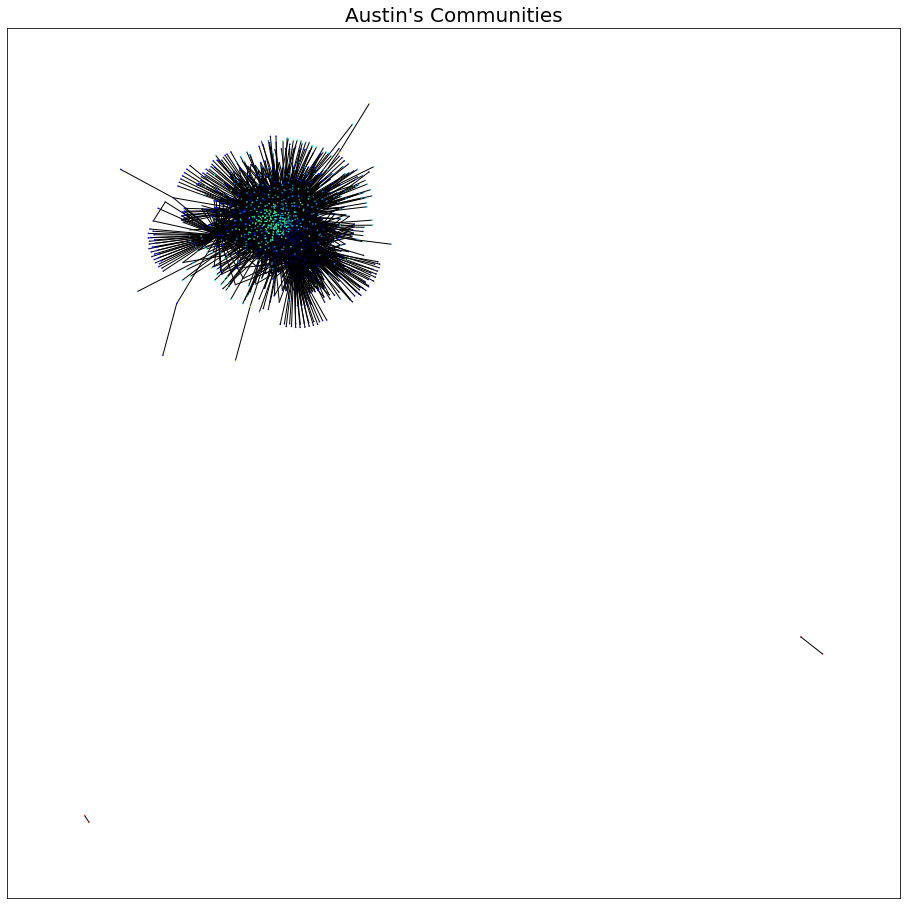

In [54]:
plt.figure(figsize=(16,16))
plt.axes=False
plt.title(f"{CITY}'s Communities",fontsize=20)
nx.draw_networkx(g, pos = pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 0.3, with_labels = False)

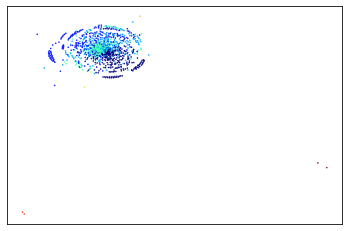

In [55]:
nx.draw_networkx_nodes(g, pos = pos,cmap = plt.get_cmap("jet"), node_color = values, node_size = 0.3)